In [1]:
import numpy as np#arrays and matrices
import pandas as pd
import nltk
import re

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

#dataset_url = "https://raw.githubusercontent.com/bigmlcom/python/master/data/spam.csv"
dataset = pd.read_csv('custom_dataset.csv')
dataset.head()


,Type,Message
0,spam,Luckily I got you an even BETTER coupon code a...
1,spam,National Instruments has been a top 100 employ...
2,spam,Confederation of Indian Industry (CII) in part...
3,spam,The Summit has shaped up well and there are ov...
4,spam,And tons of similar other questions concerning...


In [3]:
dataset_url = "spam.csv"
dataset2 = pd.read_csv(dataset_url)
dataset2.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
dataset2.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
dataset2 = dataset2.drop( ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], 1)

/home/admin1/anaconda3/envs/ham_spam/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [6]:
dataset2.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
dataset2.columns = ['Type', 'Message']

In [8]:
dataset2.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
dataset=dataset.append(dataset2, ignore_index = True)

In [10]:
dataset

,Type,Message
0,spam,Luckily I got you an even BETTER coupon code a...
1,spam,National Instruments has been a top 100 employ...
2,spam,Confederation of Indian Industry (CII) in part...
3,spam,The Summit has shaped up well and there are ov...
4,spam,And tons of similar other questions concerning...
...,...,...
5706,spam,This is the 2nd time we have tried 2 contact u...
5707,ham,Will ?_ b going to esplanade fr home?
5708,ham,"Pity, * was in mood for that. So...any other s..."
5709,ham,The guy did some bitching but I acted like i'd...


In [11]:
#dataset_url = "https://raw.githubusercontent.com/bigmlcom/python/master/data/spam.csv"
dataset3 = pd.read_csv('test.csv')
dataset3.head()

,Type,Message
0,ham,C movie is juz last minute decision mah. Juz w...
1,spam,Show ur colours! Euro 2004 2-4-1 Offer! Get an...
2,ham,Dont let studying stress you out. L8r.
3,ham,"Merry Christmas to you too babe, i love ya *ki..."
4,ham,Why did I wake up on my own &gt;:(


In [12]:
dataset=dataset.append(dataset3, ignore_index = True)

In [13]:
dataset

,Type,Message
0,spam,Luckily I got you an even BETTER coupon code a...
1,spam,National Instruments has been a top 100 employ...
2,spam,Confederation of Indian Industry (CII) in part...
3,spam,The Summit has shaped up well and there are ov...
4,spam,And tons of similar other questions concerning...
...,...,...
7545,ham,Bring tat cd don forget
7546,spam,Dont forget you can place as many FREE Request...
7547,ham,Its sarcasm.. .nt scarcasim
7548,ham,Thank you. do you generally date the brothas?


In [14]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(dataset, 'dataset.pkl')
 
# Load the model from the file
dataset = joblib.load('dataset.pkl')
 
# Use the loaded model to make predictions

<AxesSubplot:ylabel='Type'>

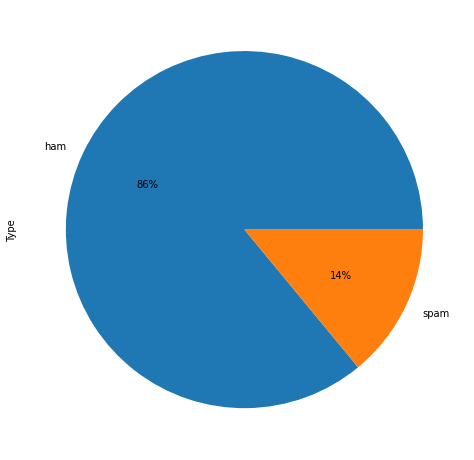

In [15]:
plt.rcParams["figure.figsize"] = [8,10] 
dataset.Type.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [16]:
dataset_ham = dataset[dataset['Type'] == "ham"]
dataset_ham_count = dataset_ham['Message'].str.split().str.len()
dataset_ham_count.index = dataset_ham_count.index.astype(str) + ' words:'
dataset_ham_count.sort_index(inplace=True)
print(dataset_ham_count)

100 words:     12.0
1000 words:     5.0
1001 words:    20.0
1002 words:    18.0
1003 words:     8.0
               ... 
995 words:      7.0
996 words:     26.0
997 words:      5.0
998 words:      8.0
999 words:      8.0
Name: Message, Length: 6492, dtype: float64


In [17]:
dataset_spam = dataset[dataset['Type'] == "spam"]
dataset_spam_count = dataset_spam['Message'].str.split().str.len()
dataset_spam_count.index = dataset_spam_count.index.astype(str) + ' words:'
dataset_spam_count.sort_index(inplace=True)
dataset_spam_count

0 words:       34
1 words:       23
10 words:      38
1004 words:    24
1006 words:    22
               ..
977 words:     28
978 words:     28
982 words:     26
988 words:     28
994 words:     28
Name: Message, Length: 1058, dtype: int64

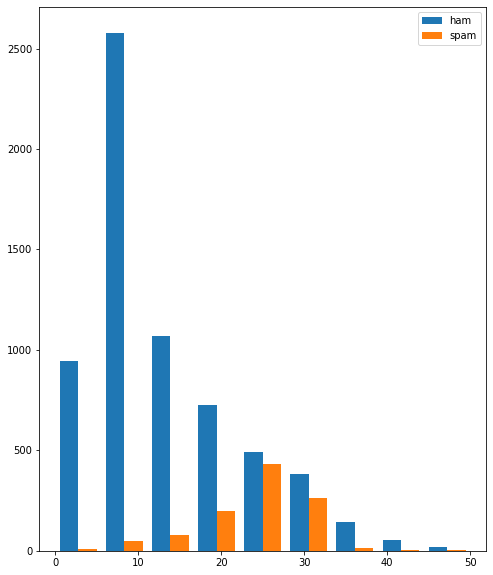

In [18]:
bins = np.linspace(0, 50, 10)

plt.hist([dataset_ham_count, dataset_spam_count], bins, label=['ham', 'spam'])
plt.legend(loc='upper right')
plt.show()

In [19]:
def text_preprocess(sen): 
   sen=str(sen)

   sen = re.sub('[^a-zA-Z]', ' ', sen)#removes everything which is not  an alpabet  replace with none 

   sen = re.sub(r"\s+[a-zA-Z]\s+", ' ', sen)

   sen = re.sub(r'\s+', ' ', sen) # eliminate duplicates

   return sen

In [20]:
X = dataset["Message"]  
 
y = dataset["Type"]

In [21]:
X_messages = [] 
messages = list(X) 

print(messages[0:5])
for mes in messages: 
     X_messages.append(text_preprocess(mes))
     print(text_preprocess(mes))

['Luckily I got you an even BETTER coupon code ai7off that gets you $7 OFF the current launch price... Use it here:\nStoodaio - when real AI meets video creation - Enable images...\nhttps://www.spinrewriter.com/stoodaio\n', 'National Instruments has been a top 100 employer of choice and best places to work by Forbes with 6000+ employees in 40 Countries', 'Confederation of Indian Industry (CII) in partnership with Ministry of Commerce & Industry, Government of India is organizing the CII’s annual flagship event - 27th Partnership Summit 2021 on a digital platform from 13 - 15 December 2021. This is being held under the Chairmanship of Mr Piyush Goyal, Minister for Commerce & Industry, Textiles, Consumer Affairs, Food & Public Distribution, Government of India.', 'The Summit has shaped up well and there are over 17 Indian and Overseas Ministers who are confirmed to address at the Summit. In addition, over 130 International speakers including several heads of Multilaterals, Global CEOs wo

Bears Pic Nick and Tom Pete and Dick In fact all types try gay chat with photo upload call min stop texts call 
 New Mobiles from MUST GO Txt NOKIA to No collect yours today From ONLY www tc biz optout gbp mtmsg TXTAUCTION
We re finally ready fyi
Auntie huai juan never pick up her phone
Double Mins Double Txt price Linerental on Latest Orange Bluetooth mobiles Call MobileUpd for the very latest offers or call optout LF 
Ya tel wats ur problem 
No Nokia Tone ur mob every week Just txt NOK to st Tone FREE so get txtin now and tell ur friends tone reply HL info
i dnt wnt to tlk wid u
We spend our days waiting for the ideal path to appear in front of us But what we forget is paths are made by walking not by waiting Goodnight 
Its ok my arm is feeling weak cuz got shot so we can go another time
Please reserve ticket on saturday eve from chennai to thirunelvali and again from tirunelvali to chennai on sunday eve already see in net no ticket available want to book ticket through tackle 
Storm

Fuck babe What happened to you How come you never came back 
This message is brought to you by GMW Ltd and is not connected to the
Some friends want me to drive em someplace probably take while
I also thk too fast Xy suggest one not me dun wan it ok Going rain leh where got gd 
Are you still getting the goods 
And maybe some pressies
Yeah am so ll leave maybe ish 
K i also fine when will you complete the course 
Under the sea there lays rock In the rock there is an envelope In the envelope there is paper On the paper there are words 
I told her had Dr appt next week She thinks m gonna die told her its just check Nothing to be worried about But she didn listen 
You in your room need few
I dont want to hear anything
Hey For me there is no leave on friday Wait will ask my superior and tell you 
Ultimately tor motive tui achieve korli 
From to only my work timing 
 and don worry we ll have finished by march ish 
The house is on the water with dock boat rolled up with newscaster who dabbles

Sad story of Man Last week was my day My Wife did nt wish me My Parents forgot so did my Kids went to work Even my Colleagues did not wish 
Are you plans with your family set in stone 
Pls dont forget to study
You ll never believe this but have actually got off at taunton Wow
Den only weekdays got special price Haiz Cant eat liao Cut nails oso muz wait until finish drivin wat lunch still muz eat wat 
She just broke down list of reasons why nobody in town and can tell if she being sarcastic or just faggy
 lt DECIMAL gt but its not common car here so its better to buy from china or asia Or if find it less expensive ll holla
The greatest test of courage on earth is to bear defeat without losing heart gn tc
SORRY IM STIL FUCKED AFTER LAST NITE WENT TOBED AT GOT UP WORK AT 
Hey so whats the plan this sat 
Beauty sleep can help ur pimples too 
Great Hope you are using your connections from mode men also cos you can never know why old friends can lead you to today
Natalja is inviting you to b

I hav almost reached Call m unable to connect 
Dear Hero am leaving to qatar tonite for an apt opportunity pls do keep in touch at lt EMAIL gt kerala
Call me m unable to cal Lets meet bhaskar and deep
I think that tantrum finished so yeah ll be by at some point
Are you this much buzy
that would be good ll phone you tomo lunchtime shall to organise something 
Do ever get song stuck in your head for no reason and it won go away til listen to it like times 
Awesome that gonna be soon or later tonight 
Cold Dont be sad dear
Hey will be really pretty late You want to go for the lesson first will join you m only reaching tp mrt
Babe How goes that day What are you doing Where are you sip my cappuccino and think of you my love send kiss to you from across the sea
HELLOGORGEOUS HOWS MY FONE WAS ON CHARGE LST NITW WEN TEXD ME HOPEU AD NICE WKEND AS IM SURE DID LOOKIN WARD IN MRW LUV JAZ
Yo do you know anyone lt gt or otherwise able to buy liquor Our guy flaked and right now if we don get hold of

As SIM subscriber you are selected to receive Bonus Get it delivered to your door Txt the word OK to No to claim msg EXP Apr
Sorry ll call later
You have WON guaranteed cash or prize To claim yr prize call our customer service representative on
 Congratulations in this week competition draw have won the prize to claim just call T Cs stop SMS Over only ppm
I can describe how lucky you are that m actually awake by noon
Ok which your another number
Someone has conacted our dating service and entered your phone because they fancy you To find out who it is call from landline PoBox tf 
Go chase after her and run her over while she crossing the street
A guy who gets used but is too dumb to realize it 
Noooooooo please Last thing need is stress For once in your life be fair 
I fine Hope you are also
Hi this is Amy we will be sending you free phone number in couple of days which will give you an access to all the adult parties 
Dude What up How Teresa Hope you have been okay When didnt hear fro

In [22]:
import nltk
#nltk.download('stopwords')

In [23]:
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf_vec = TfidfVectorizer (max_features=5000, min_df=20, max_df=0.4, stop_words=stopwords.words('english')) 


In [24]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(tfidf_vec, 'tfidf_vec.pkl')
 
# Load the model from the file
tfidf_vec_fn = joblib.load('tfidf_vec.pkl')
 
# Use the loaded model to make predictions

In [25]:
#print("Feature Names ",tfidf_vec.get_feature_names())

In [26]:
# Tf-Idf Representation Of Document1
#X = Tfidf_vect.transform(X_messages)
#print("Representation Of Document1: ", Tfidf1.toarray())

In [27]:
X= tfidf_vec.fit_transform(X_messages).toarray()

In [28]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier 

rf_clf = RandomForestClassifier(n_estimators=250, random_state=48) 
rf_clf.fit(X_train, y_train) 
y_pred = rf_clf.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred)) 
print(accuracy_score(y_test,y_pred))

[[1629    2]
 [  35  222]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1631
        spam       0.99      0.86      0.92       257

    accuracy                           0.98      1888
   macro avg       0.99      0.93      0.96      1888
weighted avg       0.98      0.98      0.98      1888

0.9804025423728814


In [33]:
print(X_messages)

['Luckily got you an even BETTER coupon code ai off that gets you OFF the current launch price Use it here Stoodaio when real AI meets video creation Enable images https www spinrewriter com stoodaio ', 'National Instruments has been top employer of choice and best places to work by Forbes with employees in Countries', 'Confederation of Indian Industry CII in partnership with Ministry of Commerce Industry Government of India is organizing the CII annual flagship event th Partnership Summit on digital platform from December This is being held under the Chairmanship of Mr Piyush Goyal Minister for Commerce Industry Textiles Consumer Affairs Food Public Distribution Government of India ', 'The Summit has shaped up well and there are over Indian and Overseas Ministers who are confirmed to address at the Summit In addition over International speakers including several heads of Multilaterals Global CEOs would be sharing their perspectives in various sessions ', 'And tons of similar other que

In [34]:
print(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [35]:
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [36]:
print(y_test)

4176     ham
393      ham
7001     ham
2877     ham
23      spam
        ... 
26      spam
7003     ham
63      spam
1044     ham
3080     ham
Name: Type, Length: 1888, dtype: object


In [37]:
y_pred = rf_clf.predict(X)

In [38]:
y_pred

array(['spam', 'spam', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [39]:
len(list(X[0]))

605

In [40]:
X.shape

(7550, 605)

In [41]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(rf_clf, 'best_random_forest_message_classification_model.pkl')
 
# Load the model from the file
rf_from_joblib = joblib.load('best_random_forest_message_classification_model.pkl')
 
# Use the loaded model to make predictions

In [42]:
dataset["Message"]

0       Luckily I got you an even BETTER coupon code a...
1       National Instruments has been a top 100 employ...
2       Confederation of Indian Industry (CII) in part...
3       The Summit has shaped up well and there are ov...
4       And tons of similar other questions concerning...
                              ...                        
7545                              Bring tat cd don forget
7546    Dont forget you can place as many FREE Request...
7547                          Its sarcasm.. .nt scarcasim
7548        Thank you. do you generally date the brothas?
7549    U R THE MOST BEAUTIFUL GIRL IVE EVER SEEN. U R...
Name: Message, Length: 7550, dtype: object

In [43]:
#user_input= input("Enter your value: ")
#print("input is" ,user_input)

In [44]:
user_input="Job alert! IT giant HCL is hiring across pan India; see how to apply | Dell Technologies is hiring techies for multiple jobs; apply now!"

In [45]:
dataset["Message"][2]=str(user_input)

In [46]:
X1 = dataset["Message"]  
 


In [47]:
X1

0       Luckily I got you an even BETTER coupon code a...
1       National Instruments has been a top 100 employ...
2       Job alert! IT giant HCL is hiring across pan I...
3       The Summit has shaped up well and there are ov...
4       And tons of similar other questions concerning...
                              ...                        
7545                              Bring tat cd don forget
7546    Dont forget you can place as many FREE Request...
7547                          Its sarcasm.. .nt scarcasim
7548        Thank you. do you generally date the brothas?
7549    U R THE MOST BEAUTIFUL GIRL IVE EVER SEEN. U R...
Name: Message, Length: 7550, dtype: object

In [48]:
X_messages1 = [] 
messages1 = list(X1) 

#messages1[4]="I re met alex nichols from middle school and it turns out he dealing "



In [49]:
print(messages1[-4])
for mes1 in messages1: 
     X_messages1.append(text_preprocess(mes1))
    # print(text_preprocess(mes1))

Dont forget you can place as many FREE Requests with 1stchoice.co.uk as you wish. For more Information call 08707808226.


In [50]:
X2= tfidf_vec.fit_transform(X_messages1).toarray()

In [51]:
X2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
len(list(X2[0]))

605

In [53]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(X2, 'vecter_array.pkl')
 
# Load the model from the file
vec_array = joblib.load('vecter_array.pkl')
 
# Use the loaded model to make predictions

In [54]:
y_pred = rf_from_joblib.predict(X2)

In [55]:
y_pred

array(['spam', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [203]:
y_pred = rf_clf.predict(X_test)

ValueError: X has 1 features, but RandomForestClassifier is expecting 1575 features as input.

In [190]:
X_test[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [188]:
y_pred

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham'], dtype=object)

In [62]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [63]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [64]:
acc=[]
model=[]

In [65]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train, y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score( y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  93.90889830508475
              precision    recall  f1-score   support

         ham       0.94      0.99      0.97      1631
        spam       0.89      0.63      0.74       257

    accuracy                           0.94      1888
   macro avg       0.92      0.81      0.85      1888
weighted avg       0.94      0.94      0.93      1888



In [66]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train, y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  0.8246822033898306
              precision    recall  f1-score   support

         ham       0.98      0.81      0.89      1631
        spam       0.43      0.90      0.58       257

    accuracy                           0.82      1888
   macro avg       0.71      0.86      0.74      1888
weighted avg       0.91      0.82      0.85      1888



In [67]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
# transform testing dataabs
X_test_norm = norm.transform(X_test)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,y_train)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.9602754237288136
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1631
        spam       0.99      0.71      0.83       257

    accuracy                           0.96      1888
   macro avg       0.98      0.86      0.90      1888
weighted avg       0.96      0.96      0.96      1888



In [68]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train, y_train)

predicted_values = LogReg.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.9703389830508474
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1631
        spam       0.98      0.80      0.88       257

    accuracy                           0.97      1888
   macro avg       0.97      0.90      0.93      1888
weighted avg       0.97      0.97      0.97      1888



In [69]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train, y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.9804025423728814
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1631
        spam       1.00      0.86      0.92       257

    accuracy                           0.98      1888
   macro avg       0.99      0.93      0.96      1888
weighted avg       0.98      0.98      0.98      1888



In [70]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train, y_train)

predicted_values = XB.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

[11:47:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  0.971927966101695
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1631
        spam       0.97      0.82      0.89       257

    accuracy                           0.97      1888
   macro avg       0.97      0.91      0.94      1888
weighted avg       0.97      0.97      0.97      1888



In [71]:
print(acc)
print(model)

[0.9390889830508474, 0.8246822033898306, 0.9602754237288136, 0.9703389830508474, 0.9804025423728814, 0.971927966101695]
['Decision Tree', 'Naive Bayes', 'SVM', 'Logistic Regression', 'RF', 'XGBoost']


In [72]:
import joblib
 
# Save the model as a pickle in a file
#joblib.dump(XB, 'xgboost_message_final.pkl')
 
# Load the model from the file
knn_from_joblib = joblib.load('xgboost_message_final.pkl')
 
# Use the loaded model to make predictions

In [73]:
user_input= input("Enter your value: ")
print(user_input)

Enter your value: hi
hi


In [74]:
#X_for_input = dataset["Message"]  

In [75]:
#X_for_input[0]=user_input

In [76]:
user_input_list=["0"]
user_input_list[0]=user_input

In [77]:
X_messages = [] 
messages1 = user_input_list

print(messages1[0:1])
for mes in messages1: 
     X_messages.append(text_preprocess(mes))

['hi']


In [78]:
tfidf_vec = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english')) 
X= tfidf_vec.fit_transform(X_messages).toarray()

ValueError: max_df corresponds to < documents than min_df

In [18]:
y_pred = knn_from_joblib.predict(X)

ValueError: Feature shape mismatch, expected: 652, got 3

In [ ]:
print(y_pred[0])